# Task 8: Weather Analysis
### Author: Aoife Flavin

The purpose of this notebook is to explain how I completed Tasks 1-7 of the weekly tasks assigned to me in the Module Computer Infrastructure, in Semester 2 of the Higher Diploma in Data Analytics at ATU.

In the first half of this notebook I explain how I completed the first 7 weekly tasks assigned to this module.

In the second half of this notebook I will use Pandas to read and analyse a file that previousl created during the module which contains weather data for Athenry.

## Part 1: Task Description

#### Task 1: Create Directory Structure
*Using the command line, create a directory (that is, a folder) named data at the root of your repository. Inside data, create two subdirectories: timestamps and weather.*

To complete the first task I began by opening the root of my repository on GitHub Codespaces I then performed the following tasks in the command line:

```
mkdir data
```
This creates a data directory


```
cd data
```
Navigate to data directory

```
mkdir timestamps
```
Creates the timestamps directory

```
mkdir weather
```
Creates the weather directory

```
cd timestamps
```
Navigates to the timestamps directory

```
touch testing.txt
```
Creates an empty text file in the time stamps directory. This is done because you cannot push an empty directory to GitHub.

```
cd ..

cd weather
```
Navigate to weather directory

```
touch testing.txt
```
Creates an empty text file in the weather directory

#### Task 2: Timestamps
*Navigate to the data/timestamps directory. Use the date command to output the current date and time, appending the output to a file named now.txt. Make sure to use the >> operator to append (not overwrite) the file. Repeat this step ten times, then use the more command to verify that now.txt has the expected content.*

To complete the second task I began by opening the root of my repository on GitHub Codespaces I then performed the following tasks in the command line:

```
cd data/timestamps
```
Navigate to the timestamps directory

```
date >> now.txt
```
This creates the file now.txt and appends the current date and time to the text file. I ran this 10 times.

```
more now.txt
```
I then used the 'more' command to view the contents of now.txt


#### Task 3: Formatting Timestamps
*Run the date command again, but this time format the output using YYYYmmdd_HHMMSS (e.g., 20261114_130003 for 1:00:03 PM on November 14, 2026). Refer to the date man page (using man date) for more formatting options. (Press q to exit the man page). Append the formatted output to a file named formatted.txt.*

To complete the third task I began by opening the root of my repository on GitHub Codespaces I then performed the following tasks in the command line:

```
cd data/timestamps
```
Navigate to the timestamps directory

```
man date
```
This allowed me to see the manual for the date function and decide how to format the date

```
q
```
Exit manual page

```
date +"%Y%m%d_%H%M%S" >> formatted.txt
```
This generates the current date and time in the specified format (YYYYmmdd_HHMMSS) and appends it to a file named formatted.txt. 

#### Task 4: Create Timestamped Files
*Use the touch command to create an empty file with a name in the YYYYmmdd_HHMMSS.txt format. You can achieve this by embedding your date command in backticks ` into the touch command. You should no longer use redirection (>>) in this step.*

To complete the fourth task I began by opening the root of my repository on GitHub Codespaces I then performed the following tasks in the command line:

```
cd data/timestamps
```
Navigate to the timestamps directory

```
touch $(date + "%Y%m%d_%H%M%S").txt
```
 This command creates an empty file with a name that includes the current date and time in the format YYYYmmdd_HHMMSS.txt.
- The $ is used for command substitution, which executes the date command and captures its output.
- The date +"%Y%m%d_%H%M%S" command generates a timestamp formatted as YYYYmmdd_HHMMSS.
- The touch command then uses this formatted timestamp as the filename, creating an empty file named something like 20241215_160000.txt.

#### Task 5: Download Today's Weather Data
*Change to the data/weather directory. Download the latest weather data for the Athenry weather station from Met Eireann using wget. Use the -O < filename > option to save the file as weather.json. The data can be found at this URL:
https://prodapi.metweb.ie/observations/athenry/today.*

To complete the fifth task I began by opening the root of my repository on GitHub Codespaces I then performed the following tasks in the command line:

```
cd data/weather
```
Navigate to the weather directory

```
wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today.
```
The 'wget' command is used to download the weather data from the url and th '-O' specifies the name of the file where the data is to be saved, in this case in 'weather.json'

#### Task 6: Timestamp the Data
*Modify the command from Task 5 to save the downloaded file with a timestamped name in the format YYYYmmdd_HHMMSS.json.*

To complete the sixth task I began by opening the root of my repository on GitHub Codespaces I then performed the following tasks in the command line:

```
cd data/weather
```
Navigate to the weather directory

```
wget -O $(date + "%Y%m%d_%H%M%S").json https://prodapi.metweb.ie/observations/athenry/today.
```
This command downloads the latest weather data for the Athenry weather station from Met Éireann using wget. 
The -O option specifies the output filename. The filename is generated using the current date and time formatted as YYYYmmdd_HHMMSS.json, making sure each download has a unique name based on when it was executed.

#### Task 7: Write the Script
*Write a bash script called weather.sh in the root of your repository. This script should automate the process from Task 6, saving the weather data to the data/weather directory. Make the script executable and test it by running it.*

To complete the seventh task I began by navigating to the root of my repository and creating a file called weather.sh
In this file I entere dthe following script:
```
#!/bin/bash

wget -O data/weather/$(date +"%Y%m%d_%H%M%S").json https://prodapi.metweb.ie/observations/athenry/today
```
This script takes the command from the previous task and specifies that the location should be in the weather folder

```
ls -al
```
In the command line I used this command to investiate the permissions of my files and found that the file weather.sh was not executable.

```
chmod u+x ./weather.sh
```
This command makes the file weather.sh executable

```
./weather.sh
```
This runs my script in weather.sh. When run this script creates a file with the weather data in a Json file with the name of the file the exact date and time the script was run.

## Part 2: Weather Analysis

### Introduction

The data analysed in this notebook was collected and published by Met Éireann. It originates from a JSON file that I retrieved and incorporated into this repository during Tasks 5–7. The file contains a nested list of hourly observations for the current day from the synoptic station located in Athenry, Co. Galway. 

The file is updated hourly, and all time values are in local time. Each hourly observation includes the following data points:
- Station Name
- Dry Bulb Temperature (in whole degrees)
- Weather Description
- Windspeed (in knots)
- Cardinal Wind Direction
- Relative Humidity (as a percentage)
- Rainfall (in millimeters)
- MSL Pressure (in millibars)
- Day of the Week
- Date
- Time of Observation

##### Import Modules

To analyse this data I began by importing the necessary libaries:
* Pandas for storing, manipulating and working with structured data.
* Glob for finding file paths.
* Matplotlib.pyplot for creating plots.

In [1]:
#Data Frames
import pandas as pd

import glob

import matplotlib.pyplot as plt

#### Single Day Data

##### Reading and Summarising the DataFrame

I first looked at the data from just one json file by using pandas to create a DataFrame and having a look at the first few rows of data and the different data types in the file. 

This file contained data from 12am to 2pm on Tuesday the 10th of December.

In [2]:
# read the file as a dataframe
df = pd.read_json('data/weather/20241210_142212.json')

In [ ]:
#Look at the first few rows of data
df.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,1,02n,Fair,"""Fair""",9,-,NE,45,89,0,1042,Tuesday,2024-10-12,00:00
1,Athenry,1,04n,Cloudy,"""Cloudy""",7,-,NE,45,87,0,1042,Tuesday,2024-10-12,01:00
2,Athenry,2,02n,Fair,"""Fair""",15,-,E,90,87,0,1041,Tuesday,2024-10-12,02:00
3,Athenry,-1,02n,Fair,"""Fair""",2,-,NW,315,92,0,1041,Tuesday,2024-10-12,03:00
4,Athenry,-3,02n,Fair,"""Fair""",2,-,S,180,93,0,1041,Tuesday,2024-10-12,04:00


In [ ]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   15 non-null     object        
 1   temperature            15 non-null     int64         
 2   symbol                 15 non-null     object        
 3   weatherDescription     15 non-null     object        
 4   text                   15 non-null     object        
 5   windSpeed              15 non-null     int64         
 6   windGust               15 non-null     object        
 7   cardinalWindDirection  15 non-null     object        
 8   windDirection          15 non-null     int64         
 9   humidity               15 non-null     int64         
 10  rainfall               15 non-null     int64         
 11  pressure               15 non-null     int64         
 12  dayName                15 non-null     object        
 13  date   

##### Calculating Averages

I then calculated what the average temperature, humidity and pressure were throughout this day.

The average temperature was 10.77 °C

The average humidity was 85.15%

The average pressure was 1027 Millibars

In [5]:
# Average temperature
average_temperature = df['temperature'].mean()
print(f"Average Temperature: {average_temperature:.2f}")

# Average humidity
average_humidity = df['humidity'].mean()
print(f"Average Humidity: {average_humidity:.2f}")

# Average pressure
average_pressure = df['pressure'].mean()
print(f"Average Pressure: {average_pressure:.2f}")

Average Temperature: -0.53
Average Humidity: 91.07
Average Pressure: 1040.73


##### Wind Speed Over Time

I created a line plot to show the changes in windspeed throughout the day. From the plot it can be seen that the windiest part of the day was at 2am, with the wind slowing down from 3am to 8am, but picking back up after that.

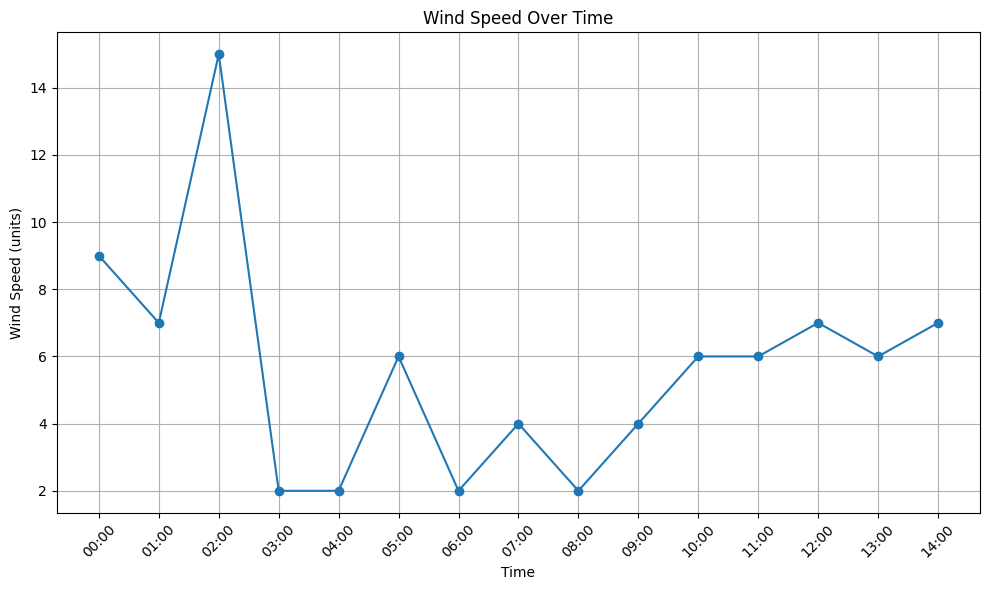

In [6]:
# Convert 'reportTime' to strings for plotting
df['reportTime'] = df['reportTime'].astype(str)

# Convert 'windSpeed' to numeric, if not already
df['windSpeed'] = pd.to_numeric(df['windSpeed'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['reportTime'], df['windSpeed'], marker='o', linestyle='-')
plt.title('Wind Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed (units)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### Temperature Over Time

I created a line plot to visualise the temperature trends throughout the day. The plot reveals a noticeable drop in temperature during the early hours of the morning, reaching its lowest point of -4.5°C around 7–8 AM. Following this, the temperature gradually rises, peaking at 4°C by 2 PM.

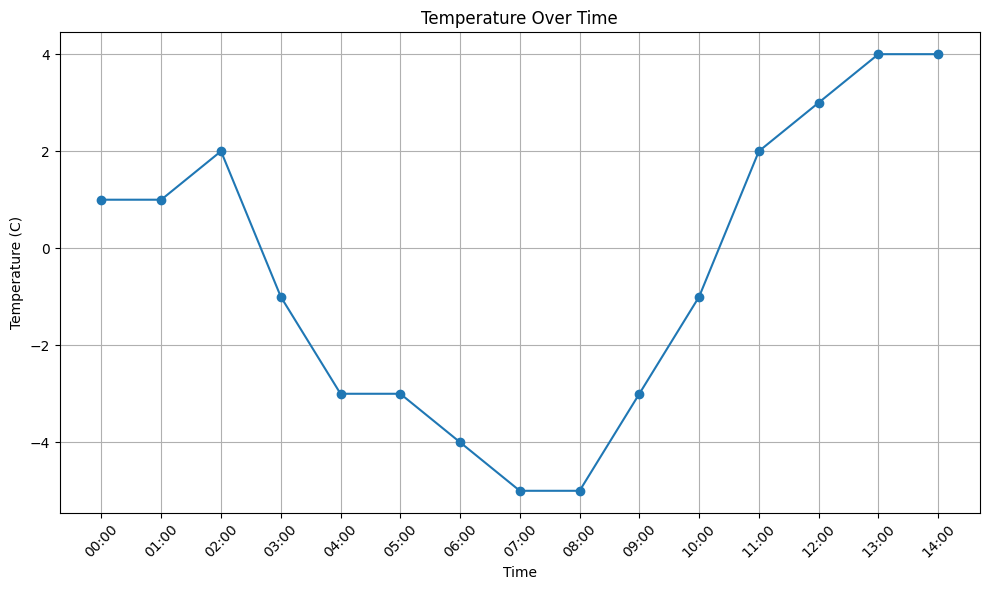

In [7]:
# Convert 'temperature' to numeric, if not already
df['temperature'] = pd.to_numeric(df['temperature'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['reportTime'], df['temperature'], marker='o', linestyle='-')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Consolidated Data

##### Read all files into a dataframe

After analszing the data from a single day, I decided to compile weather data collected from multiple points in time to gain deeper insights. To achieve this, I used the glob module to retrieve a list of all JSON files in my weather folder and iterated through each file to read them into a single DataFrame for analysis.

In [8]:
# Define the directory containing the JSON files
file_path = 'data/weather/*.json'

# Use glob to get a list of all JSON files in the directory
json_files = glob.glob(file_path)

# Initialize an empty list to store individual DataFrames
dataframes = []

# Loop through each file and read it into a DataFrame
for file in json_files:
    df = pd.read_json(file)  # Read the JSON file into a DataFrame
    dataframes.append(df)    # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())

      name  temperature symbol weatherDescription              text  \
0  Athenry           13    05n       Rain showers     "Rain shower"   
1  Athenry           13    05n       Rain showers     "Rain shower"   
2  Athenry           12    05n       Rain showers     "Rain shower"   
3  Athenry           12    05n       Rain showers     "Rain shower"   
4  Athenry           12    09n               Rain  "Moderate rain "   

   windSpeed windGust cardinalWindDirection  windDirection  humidity  \
0         22        -                    SW            225        96   
1         30        -                    SW            225        94   
2         22       44                    SW            225        96   
3         26       46                    SW            225        97   
4         28        -                    NW            315        95   

   rainfall  pressure    dayName       date reportTime  
0       0.3       993  Wednesday 2024-12-18      00:00  
1       0.7       992  Wed

##### Analyse the Data

Since some of the files were added to my repository before I established a workflow that generates a new weather file at 10 AM every day, the data includes entries from inconsistent dates and times. To address this, I counted the occurrences of each date to determine how many lines of data I have for each day.

In [9]:
# Count each day

print(combined_df['date'].value_counts())

date
2024-10-12    30
2024-12-16    22
2024-12-17    20
2024-12-18    19
2024-12-15    16
Name: count, dtype: int64


I used df.describe to generate some descriptive statistics about the data.

In [10]:
# Summarys statistics
combined_df.describe()

,temperature,windSpeed,windDirection,humidity,rainfall,pressure,date
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107
mean,7.485981,14.317757,179.158879,90.710280,0.140654,1023.532710,2024-11-28 04:02:14.579439360
min,-5.000000,2.000000,0.000000,80.000000,0.000000,991.000000,2024-10-12 00:00:00
25%,4.000000,7.000000,135.000000,86.500000,0.000000,1016.000000,2024-10-12 00:00:00
50%,10.000000,15.000000,225.000000,92.000000,0.000000,1027.000000,2024-12-16 00:00:00
75%,11.000000,20.000000,247.500000,96.000000,0.100000,1040.000000,2024-12-17 00:00:00
max,13.000000,30.000000,315.000000,99.000000,1.900000,1042.000000,2024-12-18 00:00:00
std,5.377038,7.309335,91.260786,5.572861,0.372949,15.494563,NaN


##### Count Unique Weather Descriptions

I then counted the occurrences of each unique weather description in the dataset. (It looks like it's pretty cloudy in Athenry)

In [11]:
# Count each weather description
print(combined_df['weatherDescription'].value_counts())

weatherDescription
Cloudy                47
Fair                  22
Rain showers          16
Fog / Mist             7
Light rain             7
Rain                   4
Light rain showers     4
Name: count, dtype: int64


##### Investigate Correlation Between Variables

I wanted to investigate whether there is a correlation between humidity and temperature, so I created a scatter plot to visualize the relationship. Based on the scatter plot, there doesn't appear to be a clear or obvious correlation between the two variables. However, this lack of correlation could be due to the limited amount of data available. As more datais gathered over time, a clearer pattern might emerge.

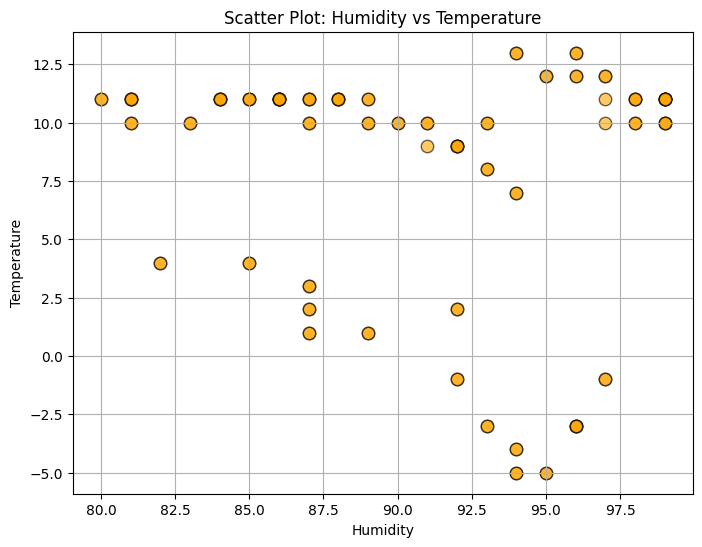

In [12]:
# Create a scatter plot to visualize the correlation between humidity and temperature
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['humidity'], combined_df['temperature'], color='orange', alpha=0.6, s=80, edgecolor='black', label='Data Points')
plt.title('Scatter Plot: Humidity vs Temperature')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

End